<a href="https://colab.research.google.com/github/Papagoat/algo-trading-strategies/blob/main/SMA300_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import yfinance as yf
import time
import requests
import io

In [ ]:
start = datetime.datetime(2010,2,1)
end = datetime.datetime.now()

In [ ]:
# url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
# s = requests.get(url).content
# companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
# Symbols = companies['Symbol'].tolist()

In [ ]:
 tsla_historical_data = yf.download(tickers="TSLA",start=start, end=end)
# tsla_historical_data = yf.Ticker('TSLA').history(period='730d', interval='1h')
tsla_historical_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2021-05-14,583.409973,592.869995,570.460022,589.739990,589.739990,33230600
2021-05-17,575.549988,589.729980,561.200012,576.830017,576.830017,32390400
2021-05-18,568.000000,596.250000,563.380005,577.869995,577.869995,36830600


In [ ]:
# # create empty dataframe
# tsla_historical_data = pd.DataFrame()
    
# try:
#     # download the stock price 
#     tsla = []
#     tsla = yf.download(tickers="TSLA",start=start, end=end, progress=False)
    
#     # append the individual stock prices 
#     if len(tsla) == 0:
#         None
#     else:
#         tsla['Name']='TSLA'
#         tsla_historical_data = tsla_historical_data.append(tsla,sort=False)
# except Exception:
#     None

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# BTC = pd.read_csv('TSLA.csv')
# BTC

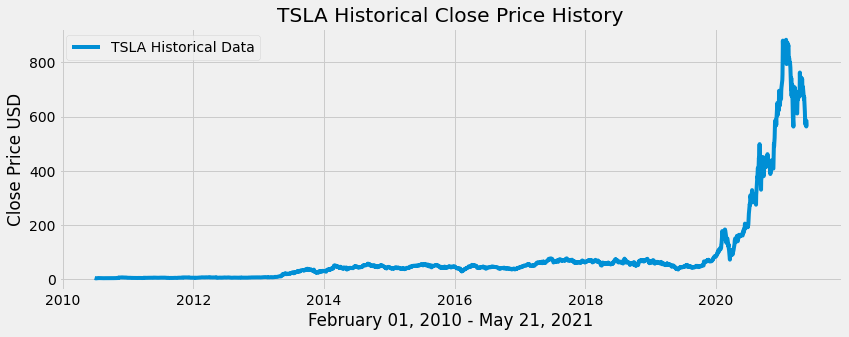

In [ ]:
plt.figure(figsize=(12.5, 4.5))
# plt.gca().invert_xaxis()
plt.plot(tsla_historical_data['Close'], label='TSLA Historical Data')
plt.title('TSLA Historical Close Price History')
plt.xlabel(f'{start.strftime("%B %d, %Y")} - {datetime.datetime.now().strftime("%B %d, %Y")}')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()

In [ ]:
SMA30 = pd.DataFrame()
SMA30['Close Price'] = tsla_historical_data['Adj Close'].rolling(window=30).mean()
SMA30 = SMA30.dropna()
SMA30

,Close Price
Date,
2010-08-10,4.008267
2010-08-11,3.968333
2010-08-12,3.926800
2010-08-13,3.902533
2010-08-16,3.899733
...,...
2021-05-14,686.771332
2021-05-17,682.963999
2021-05-18,679.172333


In [ ]:
SMA100 = pd.DataFrame()
SMA100['Close Price'] = tsla_historical_data['Adj Close'].rolling(window=100).mean()
SMA100 = SMA100.dropna()
SMA100

,Close Price
Date,
2010-11-17,4.197580
2010-11-18,4.209580
2010-11-19,4.223900
2010-11-22,4.246780
2010-11-23,4.277520
...,...
2021-05-14,725.373098
2021-05-17,724.642798
2021-05-18,724.018098


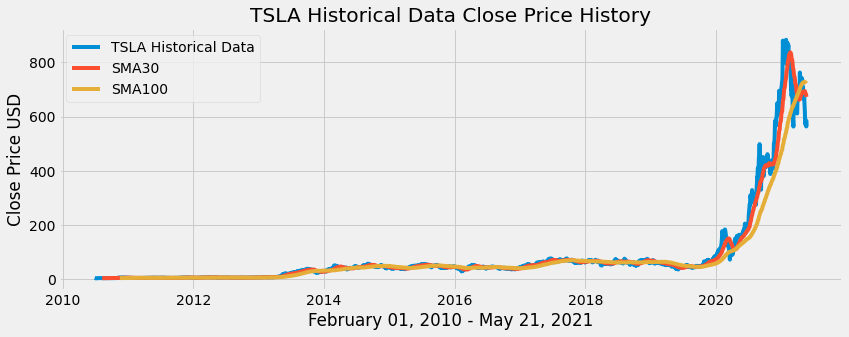

In [ ]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(tsla_historical_data['Adj Close'], label='TSLA Historical Data')
plt.plot(SMA30['Close Price'], label='SMA30')
plt.plot(SMA100['Close Price'], label='SMA100')
plt.title('TSLA Historical Data Close Price History')
plt.xlabel(f'{start.strftime("%B %d, %Y")} - {datetime.datetime.now().strftime("%B %d, %Y")}')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()

In [ ]:
data = pd.DataFrame()
data['TSLA'] = tsla_historical_data['Adj Close']
data['SMA30'] = SMA30['Close Price']
data['SMA100'] = SMA100['Close Price']
data = data.dropna()
data

,TSLA,SMA30,SMA100
Date,,,
2010-11-17,5.898000,4.615933,4.197580
2010-11-18,5.978000,4.679000,4.209580
2010-11-19,6.198000,4.749400,4.223900
2010-11-22,6.680000,4.837133,4.246780
2010-11-23,6.914000,4.932667,4.277520
...,...,...,...
2021-05-14,589.739990,686.771332,725.373098
2021-05-17,576.830017,682.963999,724.642798
2021-05-18,577.869995,679.172333,724.018098


In [ ]:
def buy_sell(data):
  sig_price_buy = []
  sig_price_sell = []
  flag = False

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if not flag:
        sig_price_buy.append(data['TSLA'][i])
        sig_price_sell.append(np.nan)
        flag = True
      else:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(data['TSLA'][i])
        flag = False
      else:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(np.nan)
    else:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(np.nan)

  return(sig_price_buy, sig_price_sell)

In [ ]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
data

,TSLA,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2010-11-17,5.898000,4.615933,4.197580,5.898,NaN
2010-11-18,5.978000,4.679000,4.209580,NaN,NaN
2010-11-19,6.198000,4.749400,4.223900,NaN,NaN
2010-11-22,6.680000,4.837133,4.246780,NaN,NaN
2010-11-23,6.914000,4.932667,4.277520,NaN,NaN
...,...,...,...,...,...
2021-05-14,589.739990,686.771332,725.373098,NaN,NaN
2021-05-17,576.830017,682.963999,724.642798,NaN,NaN
2021-05-18,577.869995,679.172333,724.018098,NaN,NaN


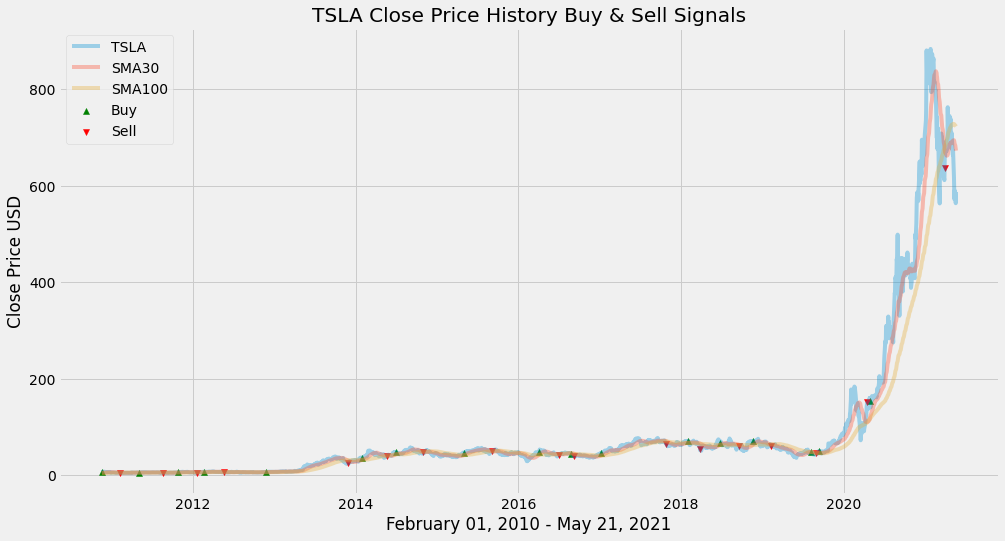

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(data['TSLA'], label='TSLA', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'], label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color='red')
plt.title('TSLA Close Price History Buy & Sell Signals')
plt.xlabel(f'{start.strftime("%B %d, %Y")} - {datetime.datetime.now().strftime("%B %d, %Y")}')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()